# Aprendizado de Máquina Supervisionado
### Bruna Scafutto Campos Jesuino - 800365
#### Dataset escolhido: Previsão de Risco de Diabetes
A base de dados escolhida utiliza dados acerca de sinais e sintomas cruciais de indivíduos que exibem sinais de diabetes ou alto risco de desenvolvimento

In [1]:
#Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Leitura dos dados
path = '/content/diabetes_risk_prediction_dataset.csv'
data = pd.read_csv(path)
print(data.head(), end = '')

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

### Divisão entre matriz de atributos X e vetor de classes Y
Os **atributos** da matriz de atributos serão: Age, Gender, Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Itching, Irritability, delayed healing, partial paresis, muscle stiffness, Alopecia e Obesity.

O vetor de **classe** será composto pela classificação Positive (Possui diabetes) e Negative (Não possui diabetes)



In [3]:
X = data.drop('class', axis=1)
Y = data['class']
# Visualizar as primeiras linhas de X e y
print("Matriz de Atributos (X):")
print(X.head())

print("\nVetor de Classes (y):")
print(Y.head())

Matriz de Atributos (X):
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity  
0              No        

### Transformação de atributos nominais em binários

In [9]:
colunas = ['Age', 'Gender','Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia','Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing','partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
X_transformado = pd.get_dummies(X, columns=colunas,drop_first=True)
y_transformado = pd.get_dummies(Y, drop_first = True)

# Visualizando as primeiras linhas de X após a transformação
print("Matriz de Atributos (X) após get_dummies:")
print(X_transformado.head())

print("Vetor de classes (y) após get_dummies:")
print(y_transformado.head())

Matriz de Atributos (X) após get_dummies:
   Age_25  Age_26  Age_27  Age_28  Age_29  Age_30  Age_31  Age_32  Age_33  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   Age_34  ...  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
0       0  ...               0                   0                    0   
1       0  ...               0                   0                    1   
2       0  ...               1                   0                    0   
3       0  ...               1                   1                    0   
4       0  ...               1                   0                    1   

   Itching_Yes  Irritability_Yes  delayed he

### Divisão do conjunto de dados do treinamento

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_transformado, y_transformado, test_size=0.33, random_state=42)

print("Dados de Treinamento:")
print("Atributos:")
print(X_train.head())
print("Classe")
print(y_train.head())
print("Dados de teste:")
print("Atributos:")
print(X_test.head())
print("Classe")
print(y_test.head())

Dados de Treinamento:
Atributos:
     Age_25  Age_26  Age_27  Age_28  Age_29  Age_30  Age_31  Age_32  Age_33  \
274       0       0       0       0       0       0       0       0       0   
426       0       0       0       0       0       0       0       0       0   
60        0       0       0       0       0       0       0       0       0   
110       0       0       0       0       0       0       0       0       0   
329       0       0       0       0       0       0       0       0       0   

     Age_34  ...  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
274       0  ...               1                   0                    1   
426       0  ...               1                   1                    1   
60        0  ...               1                   0                    0   
110       0  ...               0                   0                    1   
329       0  ...               1                   0                    1   

     Itching_Yes  Irritabilit

### Aplicação do algorítmo de indução árvore de decisão

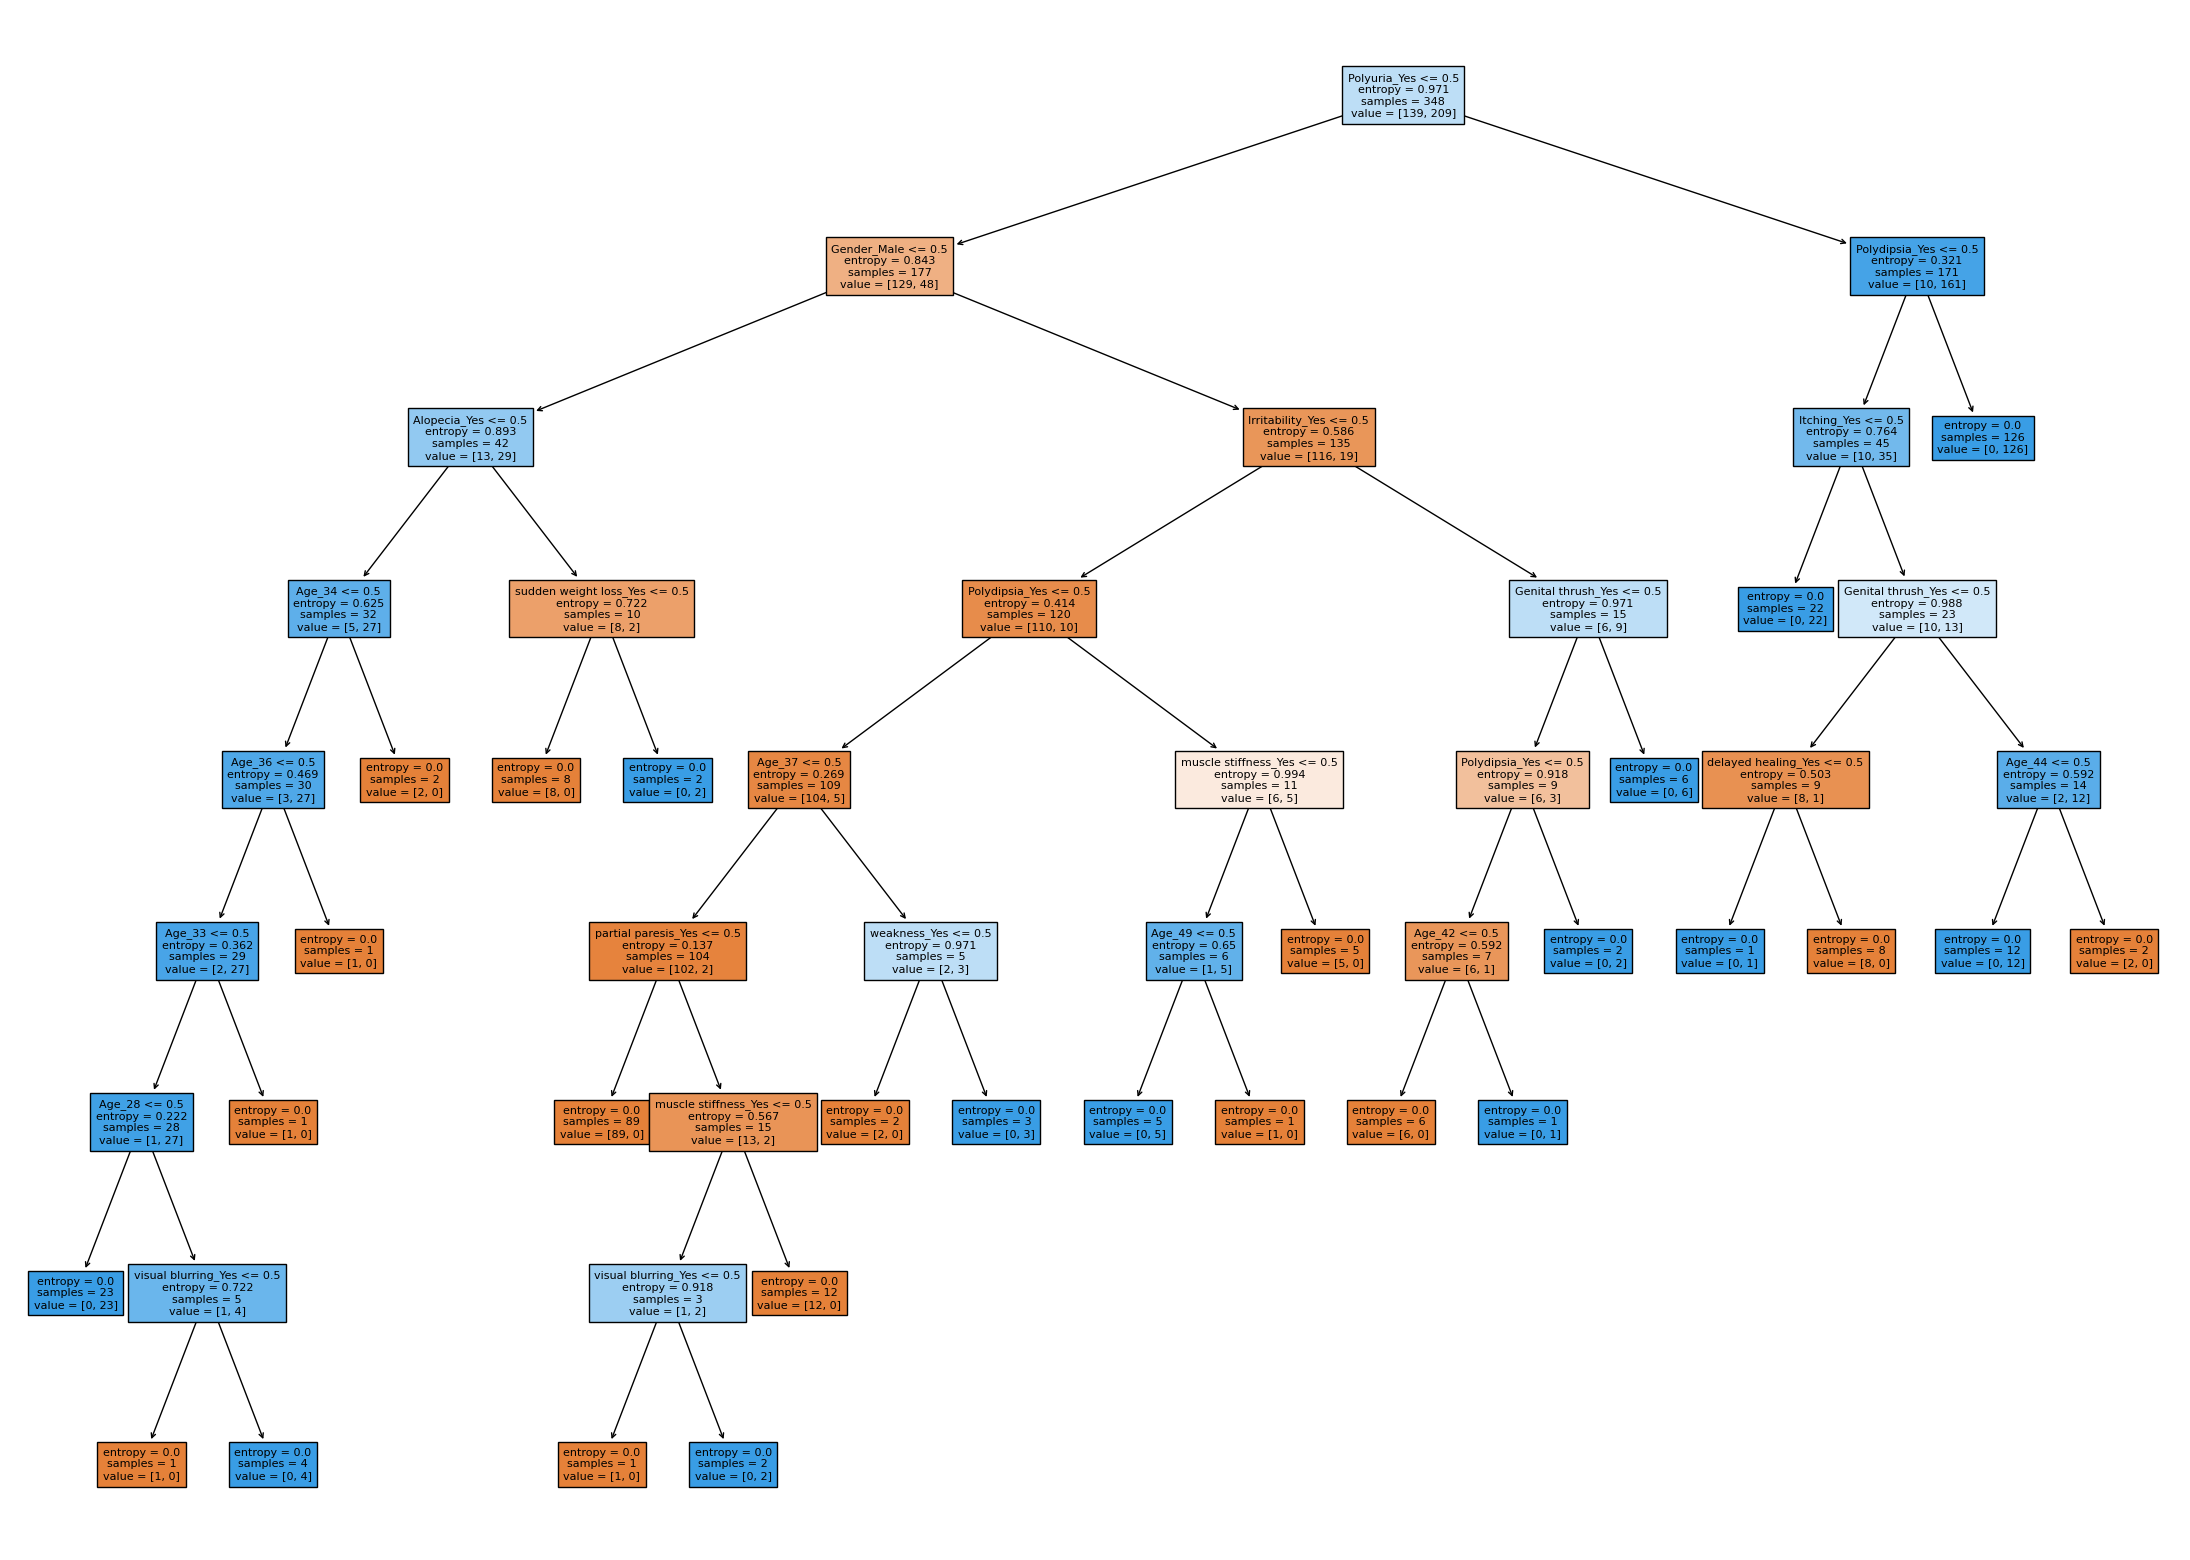

In [11]:
#Criação da Árvore de Decisão
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train,y_train)

#Visualização da árvore
plt.figure(figsize=(28, 20))
plot_tree(tree, filled=True, feature_names=X_transformado.columns, fontsize = 8)
plt.show()


#### Classificação dos dados de teste


In [12]:
# Fazer a classificação dos dados de teste
y_pred = tree.predict(X_test)

resultados = pd.DataFrame({'Real': y_test['Positive'].values, 'Previsto': y_pred})
resultados['Real'] = resultados['Real'].map({0: 'No Diabetes', 1: 'Diabetes'})
resultados['Previsto'] = resultados['Previsto'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Previa dos resultados para facilitar a comparação
print("Resultados das Previsões:\n", resultados)


Resultados das Previsões:
             Real     Previsto
0    No Diabetes  No Diabetes
1       Diabetes     Diabetes
2       Diabetes     Diabetes
3       Diabetes     Diabetes
4       Diabetes     Diabetes
..           ...          ...
167  No Diabetes  No Diabetes
168     Diabetes     Diabetes
169     Diabetes     Diabetes
170  No Diabetes  No Diabetes
171     Diabetes  No Diabetes

[172 rows x 2 columns]


### Avaliação do Modelo Gerado:

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Avaliação do modelo
conf_matrix = confusion_matrix(y_test['Positive'].values, y_pred)
accuracy = accuracy_score(y_test['Positive'].values, y_pred)
precision = precision_score(y_test['Positive'].values, y_pred)
recall = recall_score(y_test['Positive'].values, y_pred)
f1 = f1_score(y_test['Positive'].values, y_pred)

# Mostrar os resultados
print("Matriz de Confusão:\n", conf_matrix)
print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("Medida-F:", f1)

Matriz de Confusão:
 [[ 61   0]
 [  4 107]]

Acurácia: 0.9767441860465116
Precisão: 1.0
Revocação: 0.963963963963964
Medida-F: 0.9816513761467891
